# Projection

Suppose you are given a large list of $N$ items. Among these items there is one item with a unique property that we wish to locate; we will call this one the winner $w$.

To find the marked item using classical computation, one would have to check on average $N/2$ of these boxes, and in the worst case, all $N$ of them. On a quantum computer, however, we can find the marked item in roughly $\sqrt{N}$ steps with Grover's amplitude amplification trick. Additionally, the algorithm does not use the list's internal structure, which makes it generic; this is why it immediately provides a quadratic quantum speed-up for many classical problems.

## Create Quantum Circuit

In [2]:
import qiskit
from qiskit import *
from math import pi
from qiskit.tools.visualization import plot_histogram # For plotting results
from qiskit.tools.monitor import job_monitor # Get queue information using a job monitor

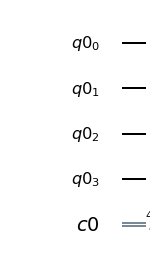

In [3]:
qr = QuantumRegister(4)
cr = ClassicalRegister(4)
qc = QuantumCircuit(qr, cr)

qc.draw(output='mpl')

### Init

In [4]:
qc.h(qr[0])
qc.h(qr[1])
qc.h(qr[2])
qc.h(qr[3])

### Oracle for 0001

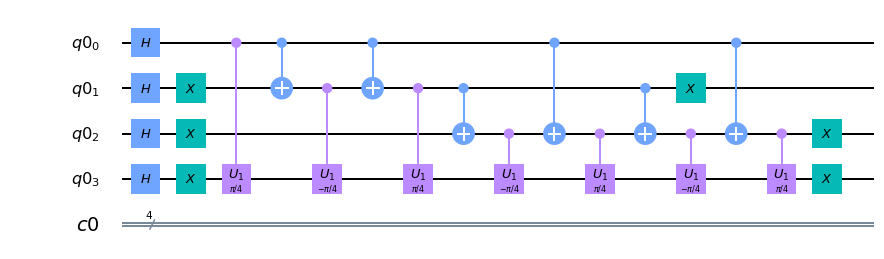

In [5]:
qc.x(qr[1])
qc.x(qr[2])
qc.x(qr[3])
qc.cu1(pi/4, qr[0], qr[3])
qc.cx(qr[0], qr[1])
qc.cu1(-pi/4, qr[1], qr[3])
qc.cx(qr[0], qr[1])
qc.cu1(pi/4, qr[1], qr[3])
qc.cx(qr[1], qr[2])
qc.cu1(-pi/4, qr[2], qr[3])
qc.cx(qr[0], qr[2])
qc.cu1(pi/4, qr[2], qr[3])
qc.cx(qr[1], qr[2])
qc.cu1(-pi/4, qr[2], qr[3])
qc.cx(qr[0], qr[2])
qc.cu1(pi/4, qr[2], qr[3])
qc.x(qr[1])
qc.x(qr[2])
qc.x(qr[3])

qc.draw(output='mpl')

### Oracle for 0101

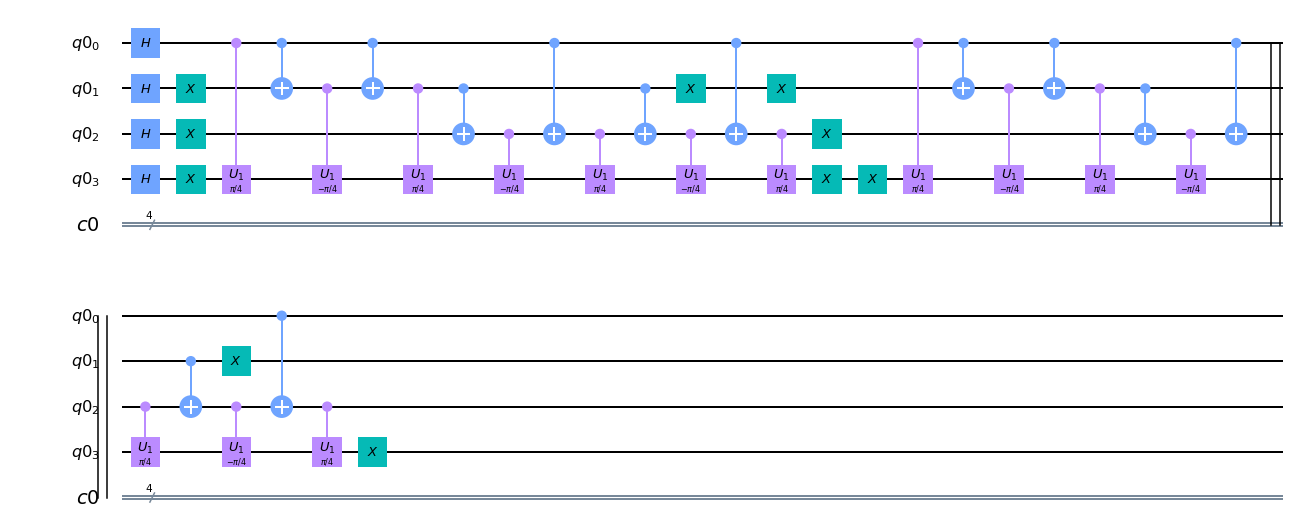

In [6]:
qc.x(qr[1])
qc.x(qr[3])
qc.cu1(pi/4, qr[0], qr[3])
qc.cx(qr[0], qr[1])
qc.cu1(-pi/4, qr[1], qr[3])
qc.cx(qr[0], qr[1])
qc.cu1(pi/4, qr[1], qr[3])
qc.cx(qr[1], qr[2])
qc.cu1(-pi/4, qr[2], qr[3])
qc.cx(qr[0], qr[2])
qc.cu1(pi/4, qr[2], qr[3])
qc.cx(qr[1], qr[2])
qc.cu1(-pi/4, qr[2], qr[3])
qc.cx(qr[0], qr[2])
qc.cu1(pi/4, qr[2], qr[3])
qc.x(qr[1])
qc.x(qr[3])

qc.draw(output='mpl')

### Oracle for 1001

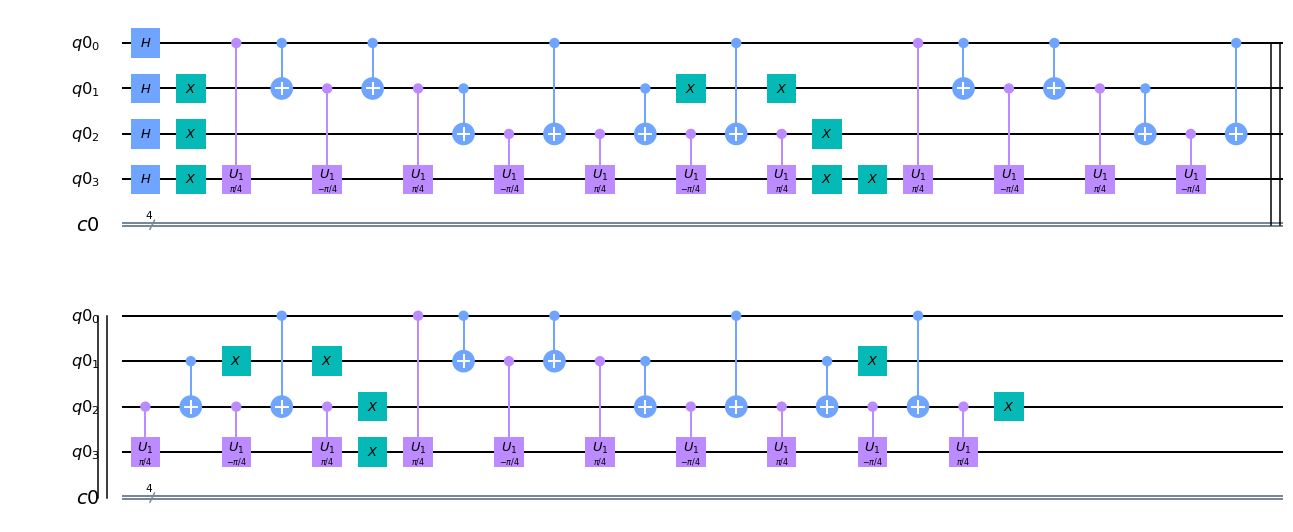

In [7]:
qc.x(qr[1])
qc.x(qr[2])
qc.cu1(pi/4, qr[0], qr[3])
qc.cx(qr[0], qr[1])
qc.cu1(-pi/4, qr[1], qr[3])
qc.cx(qr[0], qr[1])
qc.cu1(pi/4, qr[1], qr[3])
qc.cx(qr[1], qr[2])
qc.cu1(-pi/4, qr[2], qr[3])
qc.cx(qr[0], qr[2])
qc.cu1(pi/4, qr[2], qr[3])
qc.cx(qr[1], qr[2])
qc.cu1(-pi/4, qr[2], qr[3])
qc.cx(qr[0], qr[2])
qc.cu1(pi/4, qr[2], qr[3])
qc.x(qr[1])
qc.x(qr[2])

qc.draw(output='mpl')

### Oracle for 1101

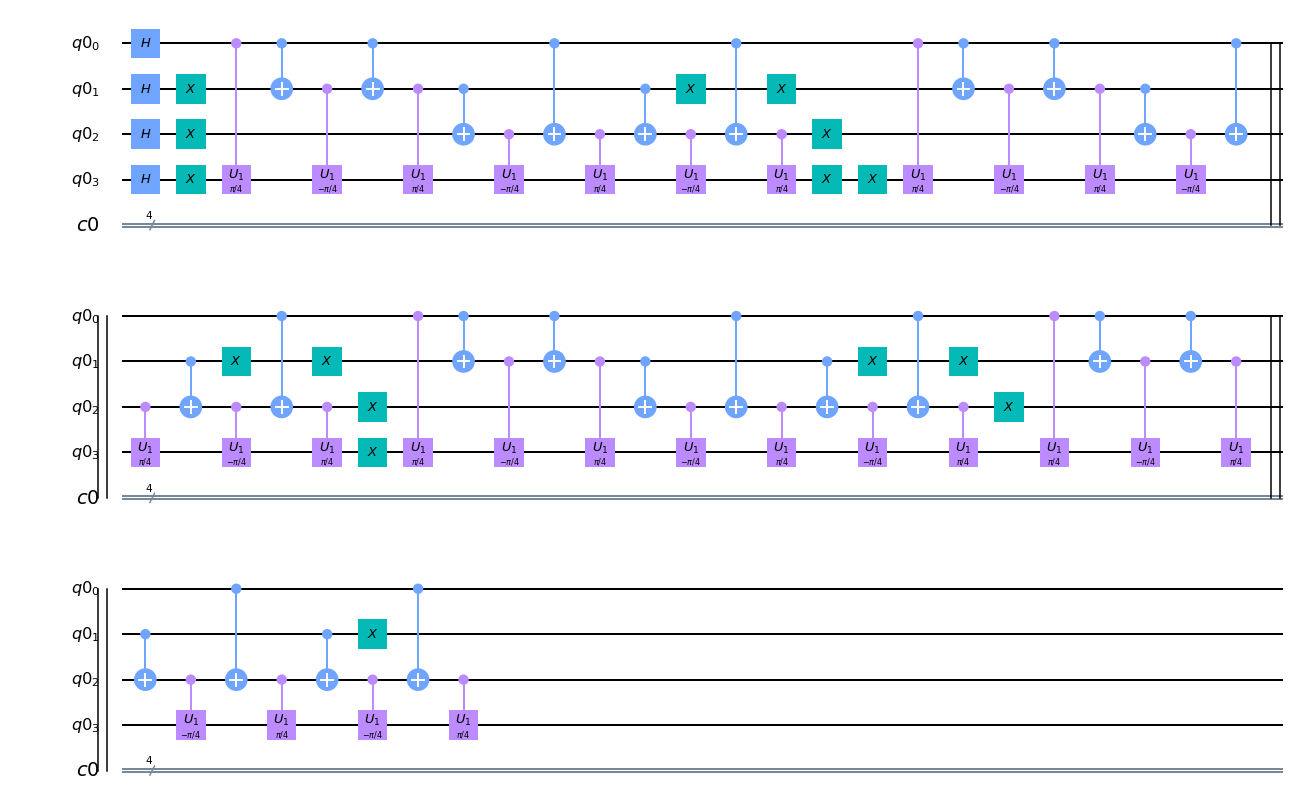

In [8]:
qc.x(qr[1])
qc.cu1(pi/4, qr[0], qr[3])
qc.cx(qr[0], qr[1])
qc.cu1(-pi/4, qr[1], qr[3])
qc.cx(qr[0], qr[1])
qc.cu1(pi/4, qr[1], qr[3])
qc.cx(qr[1], qr[2])
qc.cu1(-pi/4, qr[2], qr[3])
qc.cx(qr[0], qr[2])
qc.cu1(pi/4, qr[2], qr[3])
qc.cx(qr[1], qr[2])
qc.cu1(-pi/4, qr[2], qr[3])
qc.cx(qr[0], qr[2])
qc.cu1(pi/4, qr[2], qr[3])
qc.x(qr[1])

qc.draw(output='mpl')

### Amplification

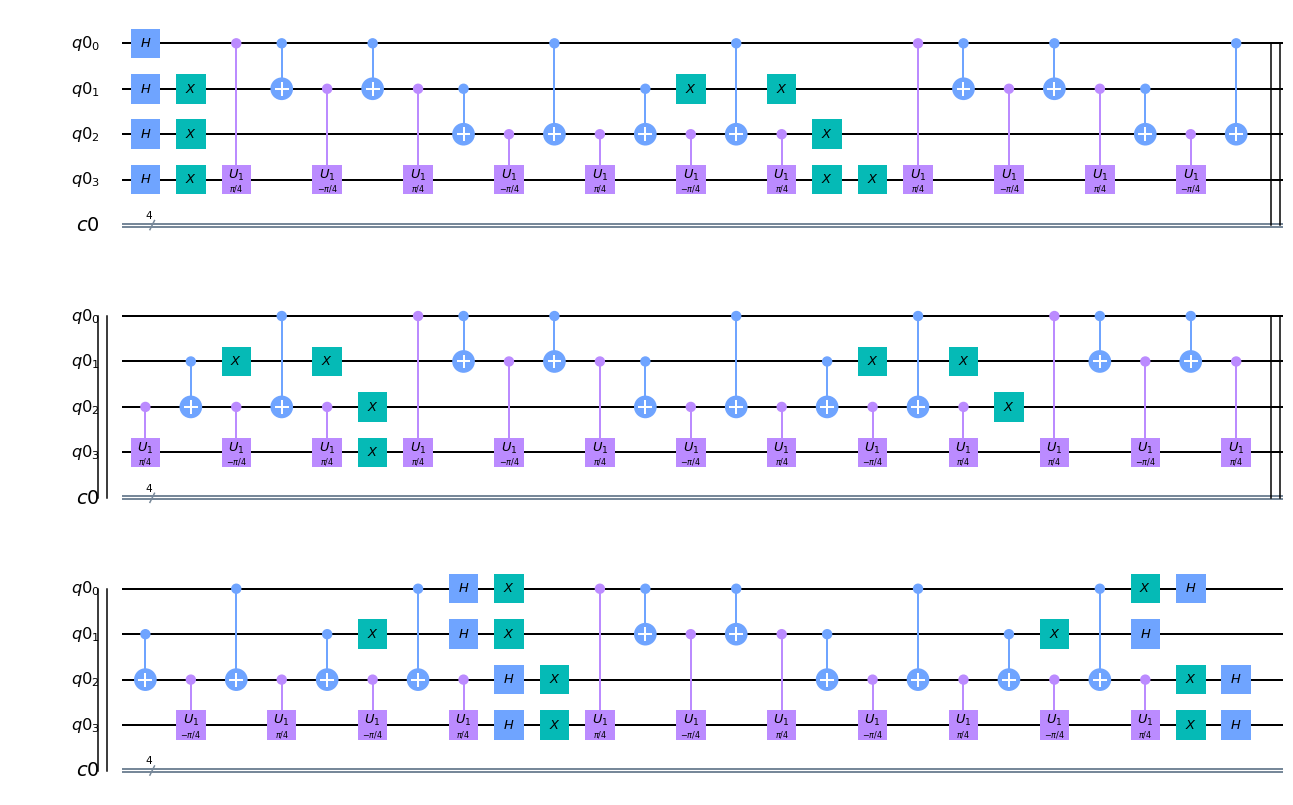

In [9]:
qc.h(qr[0])
qc.h(qr[1])
qc.h(qr[2])
qc.h(qr[3])
qc.x(qr[0])
qc.x(qr[1])
qc.x(qr[2])
qc.x(qr[3])
######## cccZ #########
qc.cu1(pi/4, qr[0], qr[3])
qc.cx(qr[0], qr[1])
qc.cu1(-pi/4, qr[1], qr[3])
qc.cx(qr[0], qr[1])
qc.cu1(pi/4, qr[1], qr[3])
qc.cx(qr[1], qr[2])
qc.cu1(-pi/4, qr[2], qr[3])
qc.cx(qr[0], qr[2])
qc.cu1(pi/4, qr[2], qr[3])
qc.cx(qr[1], qr[2])
qc.cu1(-pi/4, qr[2], qr[3])
qc.cx(qr[0], qr[2])
qc.cu1(pi/4, qr[2], qr[3])
####### end cccZ #######
qc.x(qr[0])
qc.x(qr[1])
qc.x(qr[2])
qc.x(qr[3])
qc.h(qr[0])
qc.h(qr[1])
qc.h(qr[2])
qc.h(qr[3])

qc.draw(output='mpl')

### Measure qubits

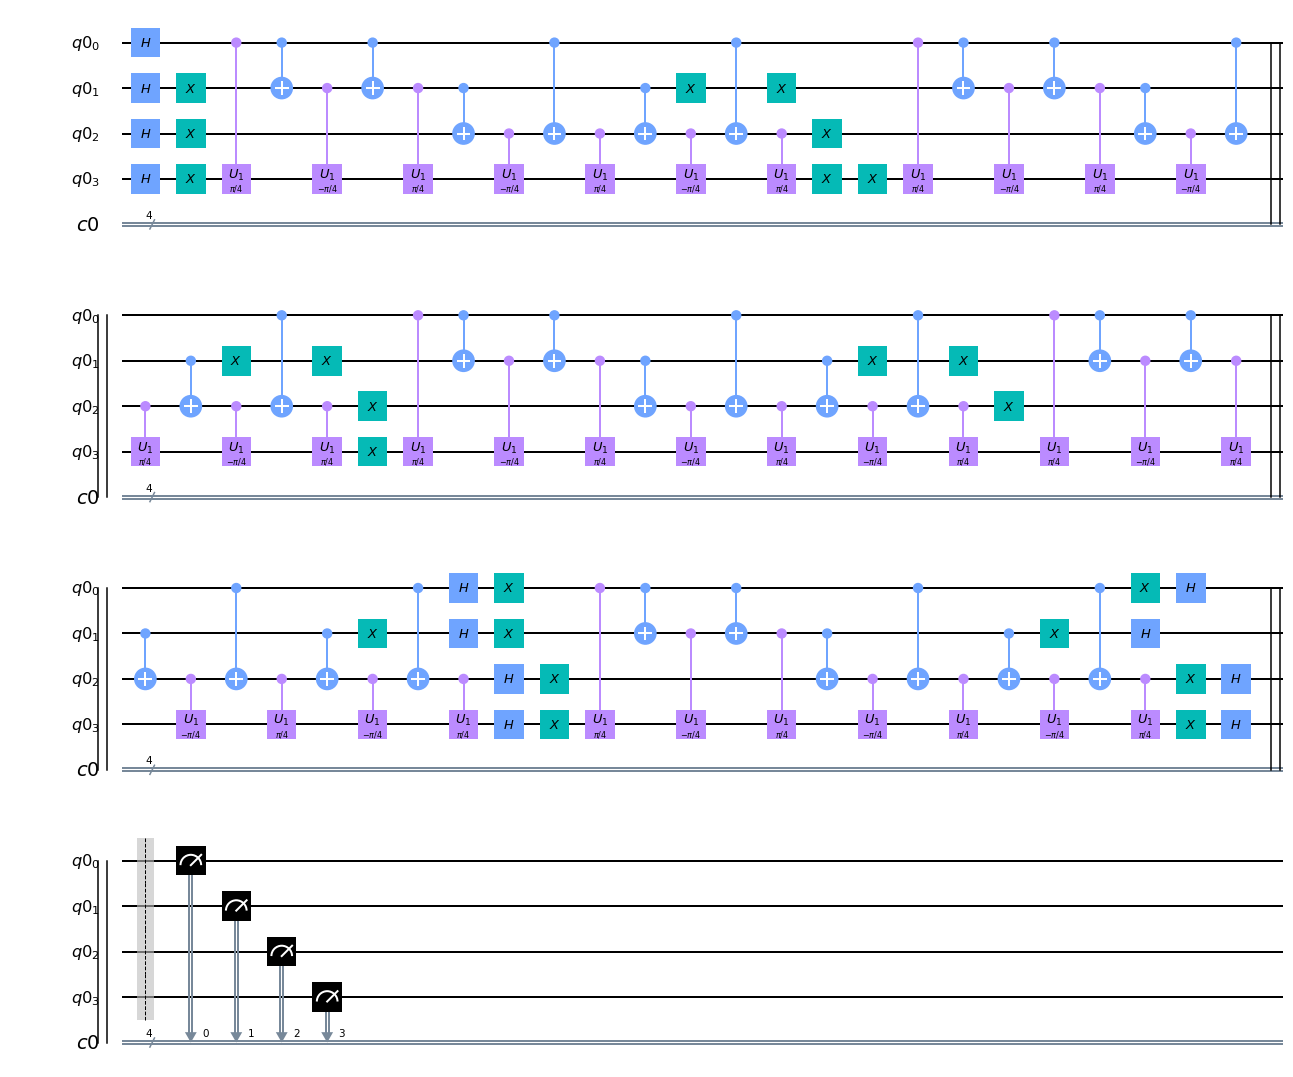

In [10]:
qc.barrier(qr)
qc.measure(qr[0], cr[0])
qc.measure(qr[1], cr[1])
qc.measure(qr[2], cr[2])
qc.measure(qr[3], cr[3])

qc.draw(output='mpl')

# Simulation on IBM's quantum computers

### Use API to get access to IBM servers

In [11]:
IBMQ.save_account('5f580f61b258cb044edd655114ac1c91ce0311107bd43c02f566a7e9fd21357a04f524a04aa60834c8d9929c34299da0a2ee6c1cf6b796ee685018a93126175e')
IBMQ.load_account()

Credentials already present. Set overwrite=True to overwrite.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

### Quantum Simulator

Job Status: job has successfully run


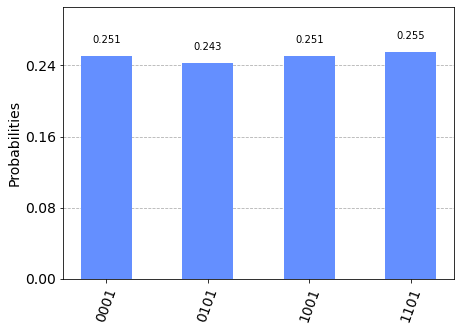

In [11]:
# Add job to pending list
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_qasm_simulator')
job = execute(qc, backend=qcomp, shots=1024)

# Get queue information using a job monitor
from qiskit.tools.monitor import job_monitor
job_monitor(job)
result = job.result()

# Plot results
plot_histogram(result.get_counts(qc))

### ibmq-london

Job Status: job has successfully run


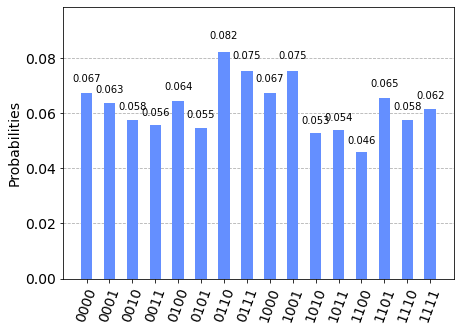

In [12]:
# Add job to pending list
provider = IBMQ.get_provider(hub='ibm-q')
qcomp = provider.get_backend('ibmq_london')
job = execute(qc, backend=qcomp, shots=1024)

job_monitor(job)
result = job.result()

# Plot results
plot_histogram(result.get_counts(qc))

### ibmq-burlington

Job Status: job has successfully run


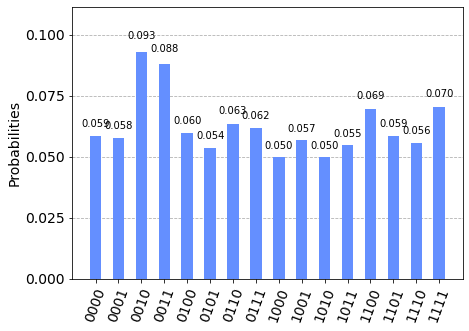

In [13]:
# Add job to pending list
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_burlington')
job = execute(qc, backend=qcomp, shots=1024)

# Get queue information using a job monitor
from qiskit.tools.monitor import job_monitor
job_monitor(job)
result = job.result()

# Plot results
plot_histogram(result.get_counts(qc))

### ibmq-vigo

Job Status: job has successfully run


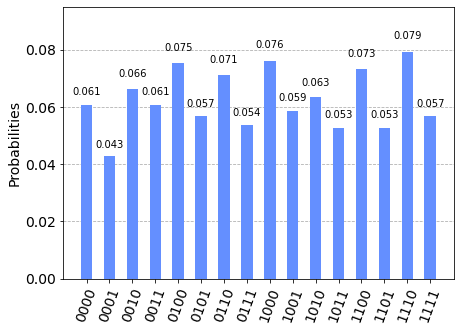

In [12]:
# Add job to pending list
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_vigo')
job = execute(qc, backend=qcomp, shots=1024)

# Get queue information using a job monitor
from qiskit.tools.monitor import job_monitor
job_monitor(job)
result = job.result()

# Plot results
plot_histogram(result.get_counts(qc))

### ibmq-oursense

Job Status: job has successfully run


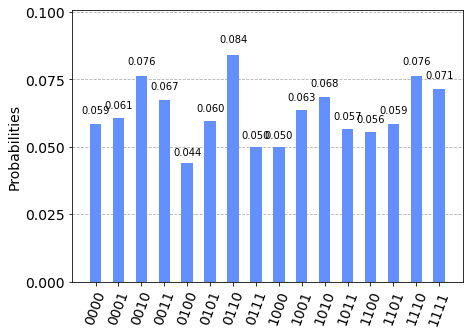

In [20]:
# Add job to pending list
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_ourense')
job = execute(qc, backend=qcomp, shots=1024)

# Get queue information using a job monitor
from qiskit.tools.monitor import job_monitor
job_monitor(job)
result = job.result()

# Plot results
plot_histogram(result.get_counts(qc))

### ibmqx2

Job Status: job has successfully run


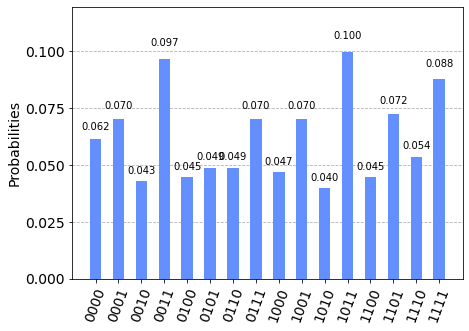

In [18]:
# Add job to pending list
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmqx2')
job = execute(qc, backend=qcomp, shots=1024)

# Get queue information using a job monitor
from qiskit.tools.monitor import job_monitor
job_monitor(job)
result = job.result()

# Plot results
plot_histogram(result.get_counts(qc))